# Final Project: Report on Data Analysis Technique

Hey everyone! For this assignment, you will be working in groups to analyze a dataset using various data analysis techniques. Here's what you need to do:

**Objective:**
1. Dataset Selection
Get together with your group and choose a dataset that interests all of you. It can be the same dataset as last time or a completely new one.

2. Data Analysis Techniques
Apply any one or more of the following data analysis techniques to your chosen dataset:
- Apriori Algorithm
- Clustering
    - K-means
    - EM Clustering
    - DBScan Clustering
    - SLINK Clustering
- Linear Regression

3. Data Preparation
Once you have your dataset, make sure it's ready for analysis. Clean the data, handle missing values, and prepare it for the chosen analysis technique.

4. Analysis and Insights
Use the selected technique to analyze the dataset. Dive deep into the insights and patterns that emerge from your analysis.

5. Presentation Preparation
Prepare a presentation to showcase your findings to the class. Create visualizations on both the descriptive statistics and the results of your analysis and provide clear explanations for the insights you've gathered. Take note of the suggestions and recommendations I've outlined regarding visualizing data from your midterm project.

6. Presentation Recording
Since we will be presenting online, pre-record your presentation to ensure it's within 10-12 minutes. Keep it concise and engaging for your audience.

7. Grading Criteria
Your assignment will be graded based on the following criteria:
 Analysis Technique (30%)

Alignment of the chosen analysis technique with the dataset and research question.
Depth and Quality of Insights (30%)

Clear interpretation of results with meaningful insights.
Exploration of patterns, trends, or anomalies in the data.
Data Visualization (15%)

Appropriate use of charts and graphs for the given data.

Creativity and Novelty (15%)

Presentation of unique or surprising findings.
Exploration of creative approaches to the problem or dataset.
Presentation Quality (10%)

Clarity and coherence of the presentation.
Use of effective visualizations to explain findings.
Engagement and conciseness in delivering the recorded presentation.
Remember to collaborate effectively with your group members and have fun exploring and analyzing your chosen dataset! If you have any questions, feel free to reach out to me. Final presentations will be on December 9, 2024 from 4 PM to 7PM. If any groups haven't finished by then, there will be one final presentation on December 11, 2024.

For your submission, include a link to your video (make sure it is publicly accessible) as well as a document detailing the individual contributions of each member.

Good luck!

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [312]:
# Cleaning the csv file and creating cleaned csv files
df = pd.read_csv('employment_rates.csv', delimiter=';', skiprows=2, encoding='utf-8', na_values=[".."])

df.columns = [
    "Year", 
    "Month", 
    "Labor Force Participation Rate", 
    "Employment Rate", 
    "Unemployment Rate", 
    "Underemployment Rate", 
    "Visible Underemployment Rate"
]

# quarter_map = {
#     "January": "Q1",
#     "April": "Q2",
#     "July": "Q3",
#     "October": "Q4",
# }

quarter_map = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["MonthNum"] = df["Month"].map(month_map)

df.fillna(0, inplace=True)

df["Quarter"] = df["Month"].map(quarter_map)

df.sort_values(by=["Year", "MonthNum"], inplace=True)

monthly_data = df[(df["Month"] != "Annual") & (df["Year"] != 2024)]
annual_data = df[(df["Month"] == "Annual") & (df["Year"] != 2024)]

monthly_data.to_csv("MonthlyLaborForceData.csv", index=False)
annual_data.to_csv("AnnualLaborForceData.csv", index=False)

df.to_csv("CleanedLaborForceData.csv", index=False)


In [313]:
# Filling the 0 values by copying the previous month and update quarterly trend
df = pd.read_csv('MonthlyLaborForceData.csv')

columns_to_check = [
    'Labor Force Participation Rate',
    'Employment Rate',
    'Unemployment Rate',
    'Underemployment Rate',
    'Visible Underemployment Rate'
]

for year in range(2005, 2021):
    year_data = df[df['Year'] == year].sort_values(by=['MonthNum'])
    
    last_valid_data = None
    
    for month_name in list(month_map.keys()):
        month_data = year_data[year_data['Month'] == month_name]
        
        if not month_data.empty:
            if (month_data[columns_to_check] == 0).any(axis=None):

                df = df[~((df['Year'] == year) & (df['Month'] == month_name))]
                
                if last_valid_data is not None:
                    missing_data = last_valid_data.copy()
                    missing_data['Month'] = month_name
                    
                    df = pd.concat([df, missing_data.to_frame().T], ignore_index=True)
            else:
                last_valid_data = month_data.iloc[0]
        else:
            if last_valid_data is not None:
                missing_data = last_valid_data.copy()
                missing_data['Month'] = month_name
                
                df = pd.concat([df, missing_data.to_frame().T], ignore_index=True)

df['MonthNum'] = df['Month'].map(month_map)
df = df.sort_values(by=['Year', 'MonthNum'])

df.reset_index(drop=True, inplace=True)

df.to_csv('UpdatedMonthlyLaborForceData.csv', index=False)

print(df.head())

monthly_data = df[(df["Month"] != "Annual") & (df["Year"] != 2024)]


   Year     Month Labor Force Participation Rate Employment Rate  \
0  2005   January                           66.0            88.6   
1  2005  February                           66.0            88.6   
2  2005     March                           66.0            88.6   
3  2005     April                          65.37           91.72   
4  2005       May                          65.37           91.72   

  Unemployment Rate Underemployment Rate Visible Underemployment Rate  \
0              11.4                 16.0                          9.8   
1              11.4                 16.0                          9.8   
2              11.4                 16.0                          9.8   
3              8.28                25.76                        13.97   
4              8.28                25.76                        13.97   

   MonthNum Quarter  
0         1      Q1  
1         2      Q1  
2         3      Q1  
3         4      Q2  
4         5      Q2  


In [314]:
# Descriptive Statistics
print(monthly_data.describe())
print(annual_data.describe())

         MonthNum
count  228.000000
mean     6.500000
std      3.459648
min      1.000000
25%      3.750000
50%      6.500000
75%      9.250000
max     12.000000
              Year  Labor Force Participation Rate  Employment Rate  \
count    19.000000                       19.000000        19.000000   
mean   2014.000000                       63.435789        93.217895   
std       5.627314                        1.552172         1.358870   
min    2005.000000                       59.520000        89.740000   
25%    2009.500000                       63.415000        92.575000   
50%    2014.000000                       63.970000        92.960000   
75%    2018.500000                       64.310000        94.420000   
max    2023.000000                       65.250000        95.650000   

       Unemployment Rate  Underemployment Rate  Visible Underemployment Rate  \
count          19.000000             19.000000                     19.000000   
mean            6.782105             1

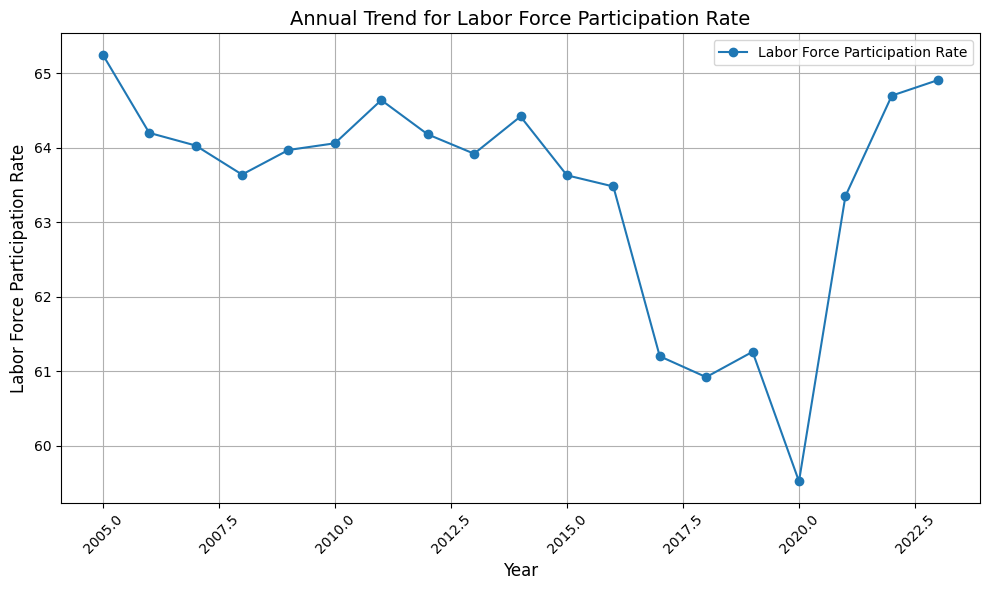

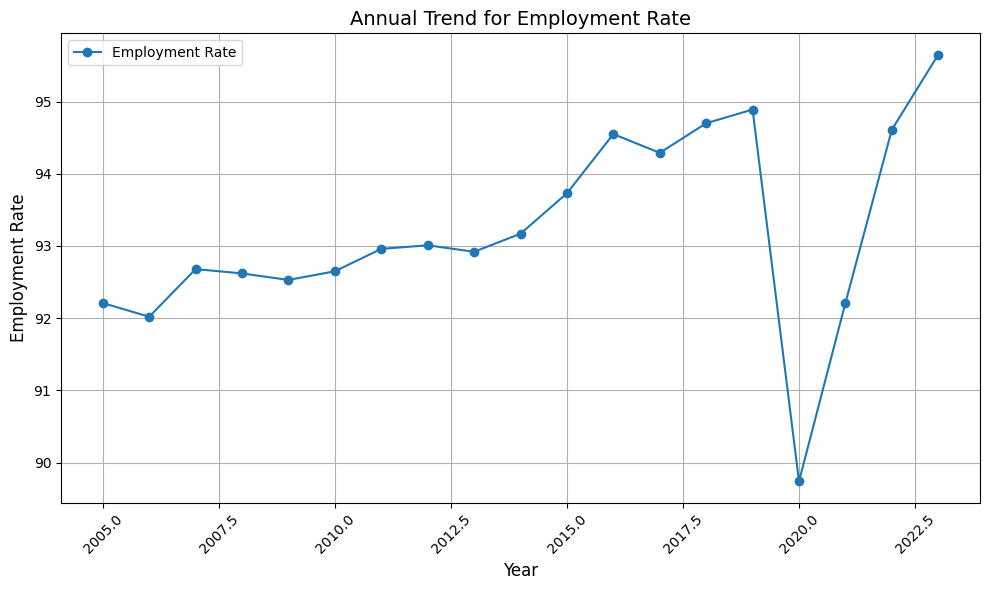

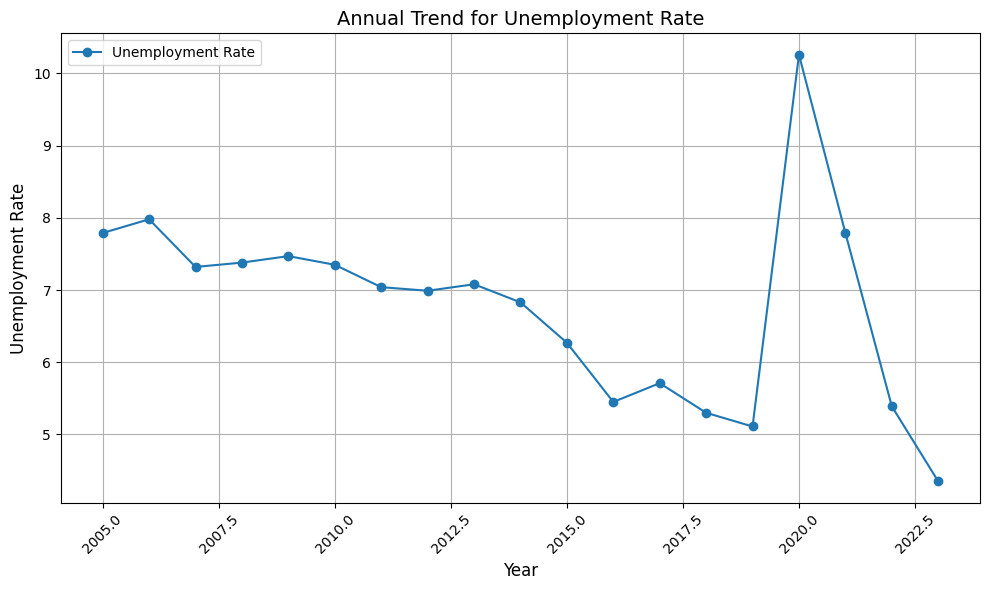

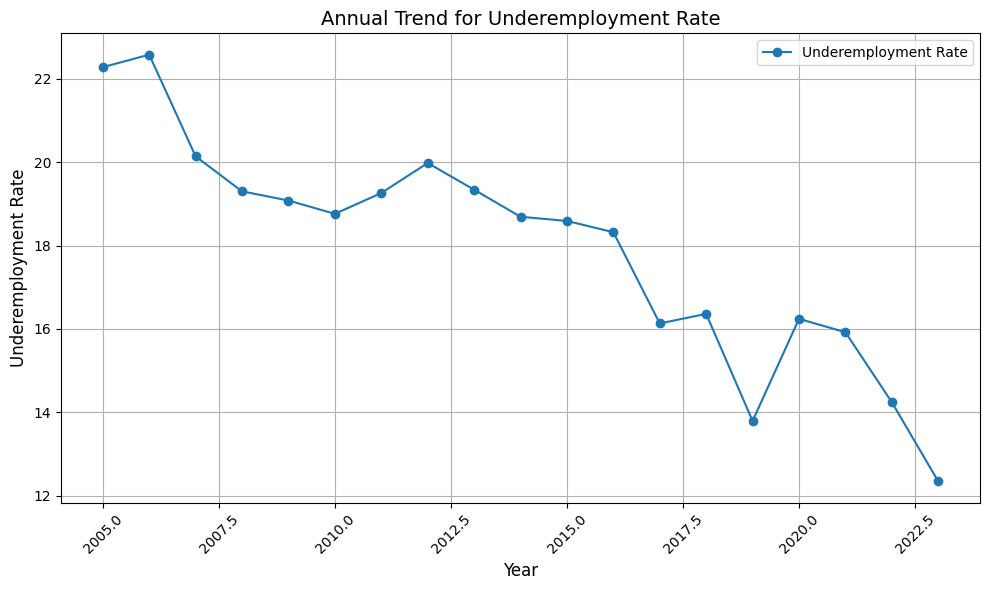

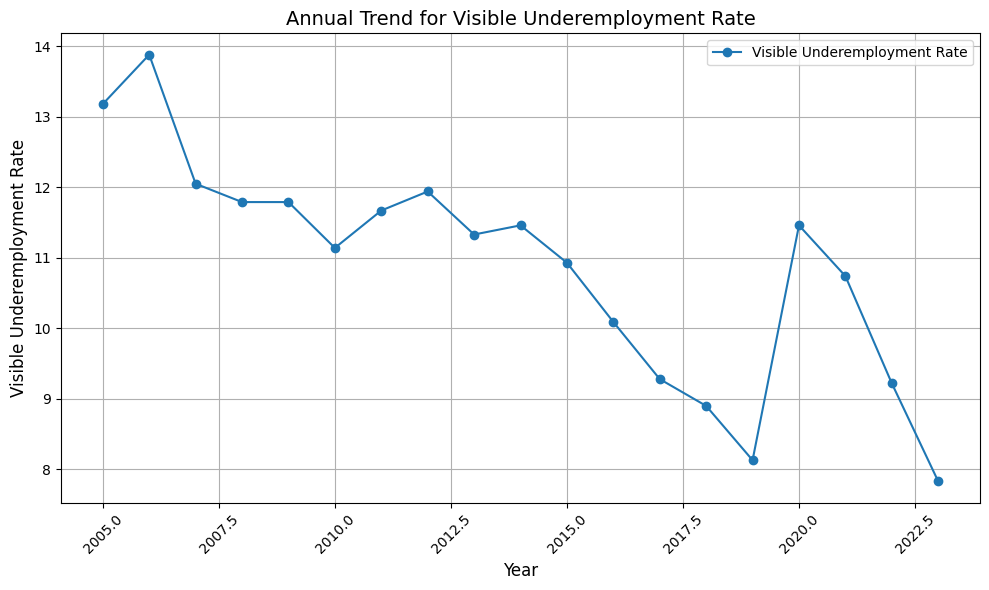

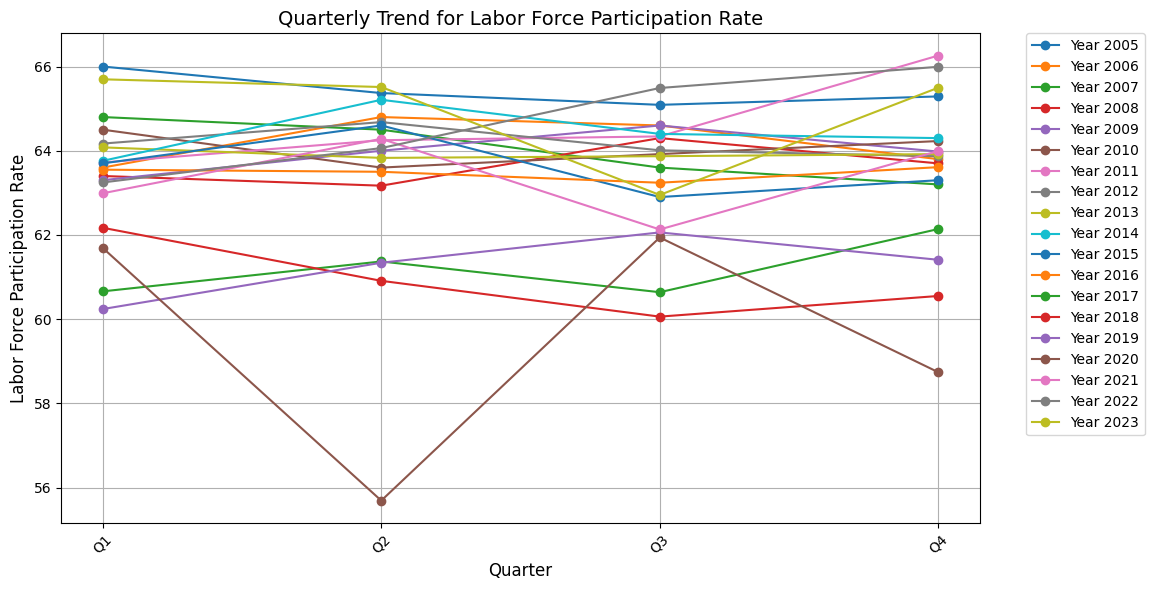

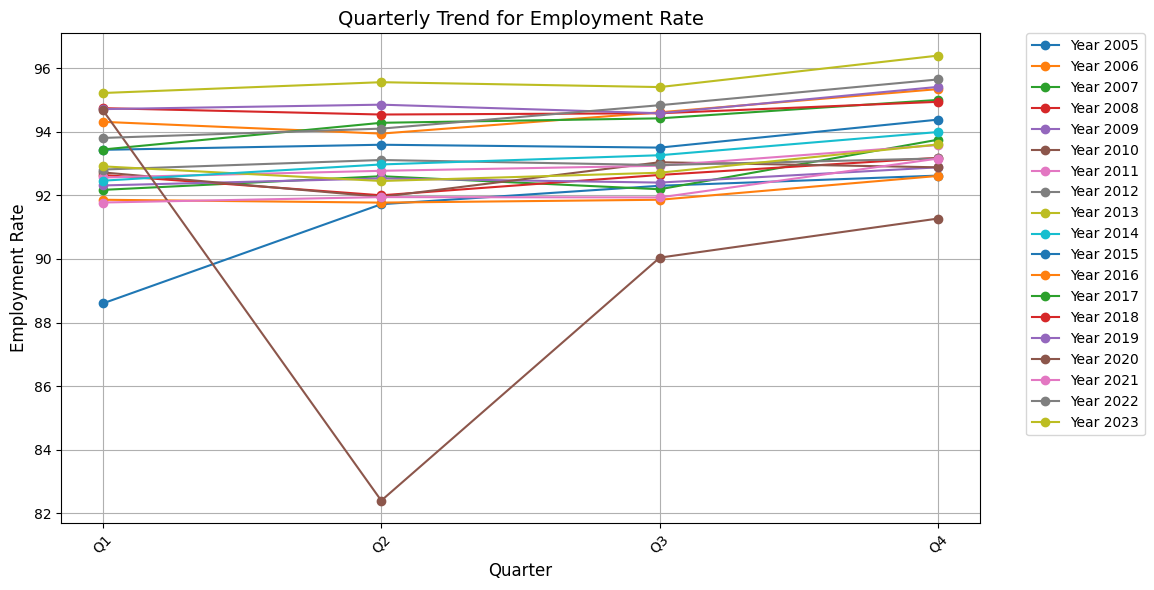

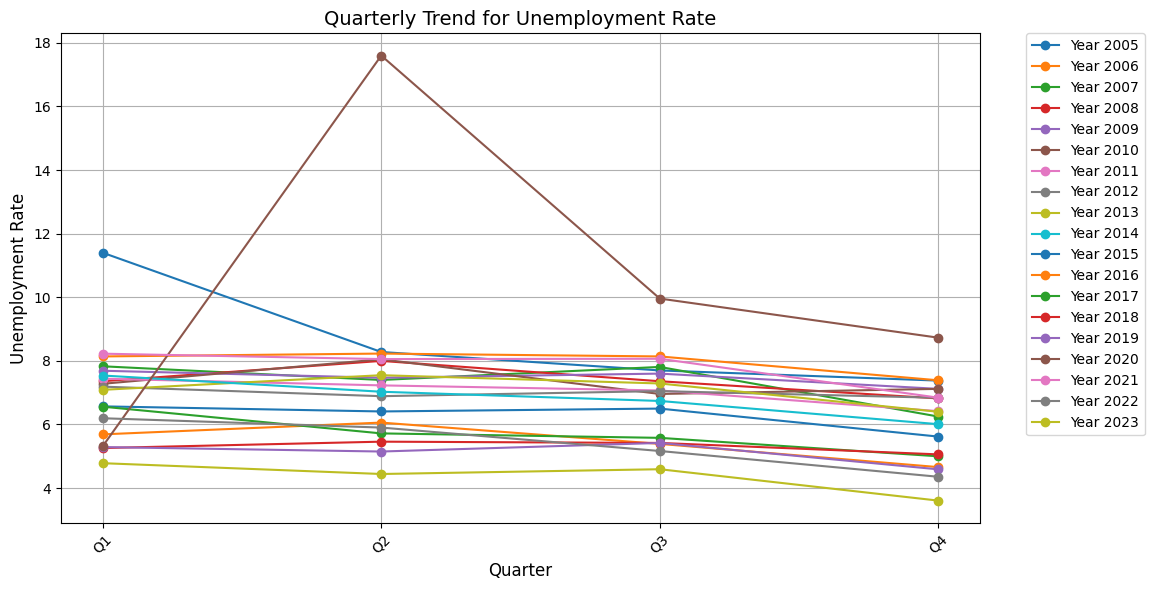

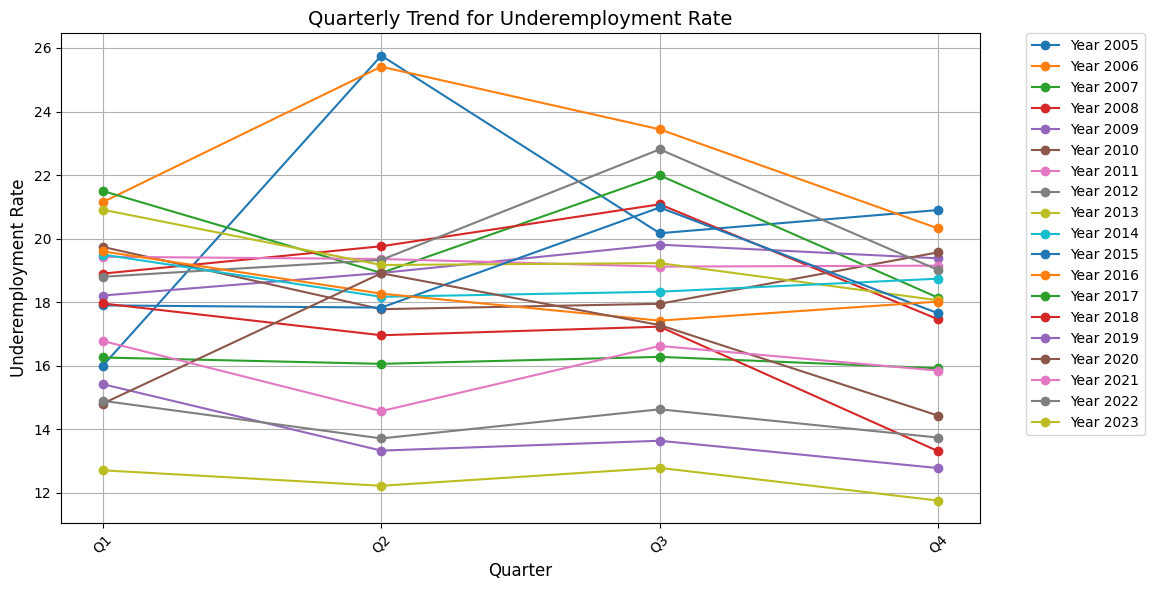

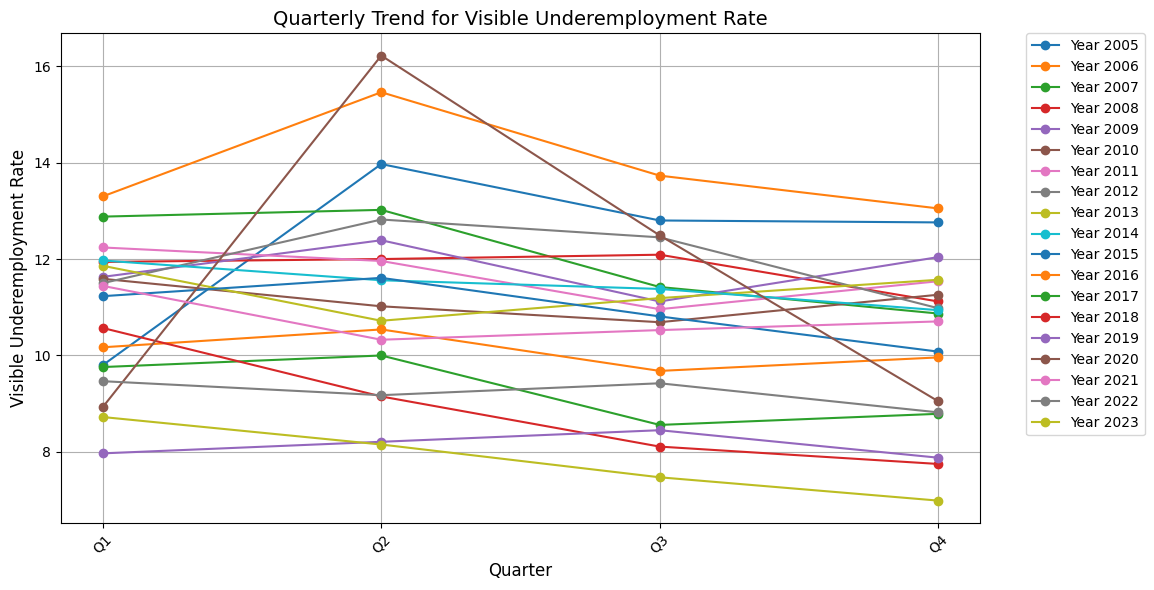

In [315]:
# Trend for each rate for both quarterly and annually
numeric_columns = [
    "Labor Force Participation Rate", 
    "Employment Rate", 
    "Unemployment Rate", 
    "Underemployment Rate", 
    "Visible Underemployment Rate"
]

annual_trends = annual_data.groupby("Year")[numeric_columns].mean()

quarterly_trends = monthly_data.groupby(["Year", "Quarter"])[numeric_columns].mean()

all_quarters = ["Q1", "Q2", "Q3", "Q4"]

years_with_all_quarters = pd.MultiIndex.from_product(
    [monthly_data["Year"].unique(), all_quarters], 
    names=["Year", "Quarter"]
)

quarterly_trends = quarterly_trends.reindex(years_with_all_quarters, fill_value=0)

annual_trends.to_csv("AnnualTrends.csv")
quarterly_trends.to_csv("QuarterlyTrends.csv")

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(annual_trends.index, annual_trends[column], marker='o', label=column)
    plt.title(f'Annual Trend for {column}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid()
    plt.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig(f"Annual_Trend_{column.replace(' ', '_')}.png")
    plt.show()

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    for year in quarterly_trends.index.get_level_values("Year").unique():
        year_data = quarterly_trends.xs(year, level="Year")
        plt.plot(year_data.index, year_data[column], marker='o', label=f'Year {year}')
    plt.title(f'Quarterly Trend for {column}', fontsize=14)
    plt.xlabel('Quarter', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid()

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.savefig(f"Quarterly_Trend_{column.replace(' ', '_')}.png")
    plt.show()



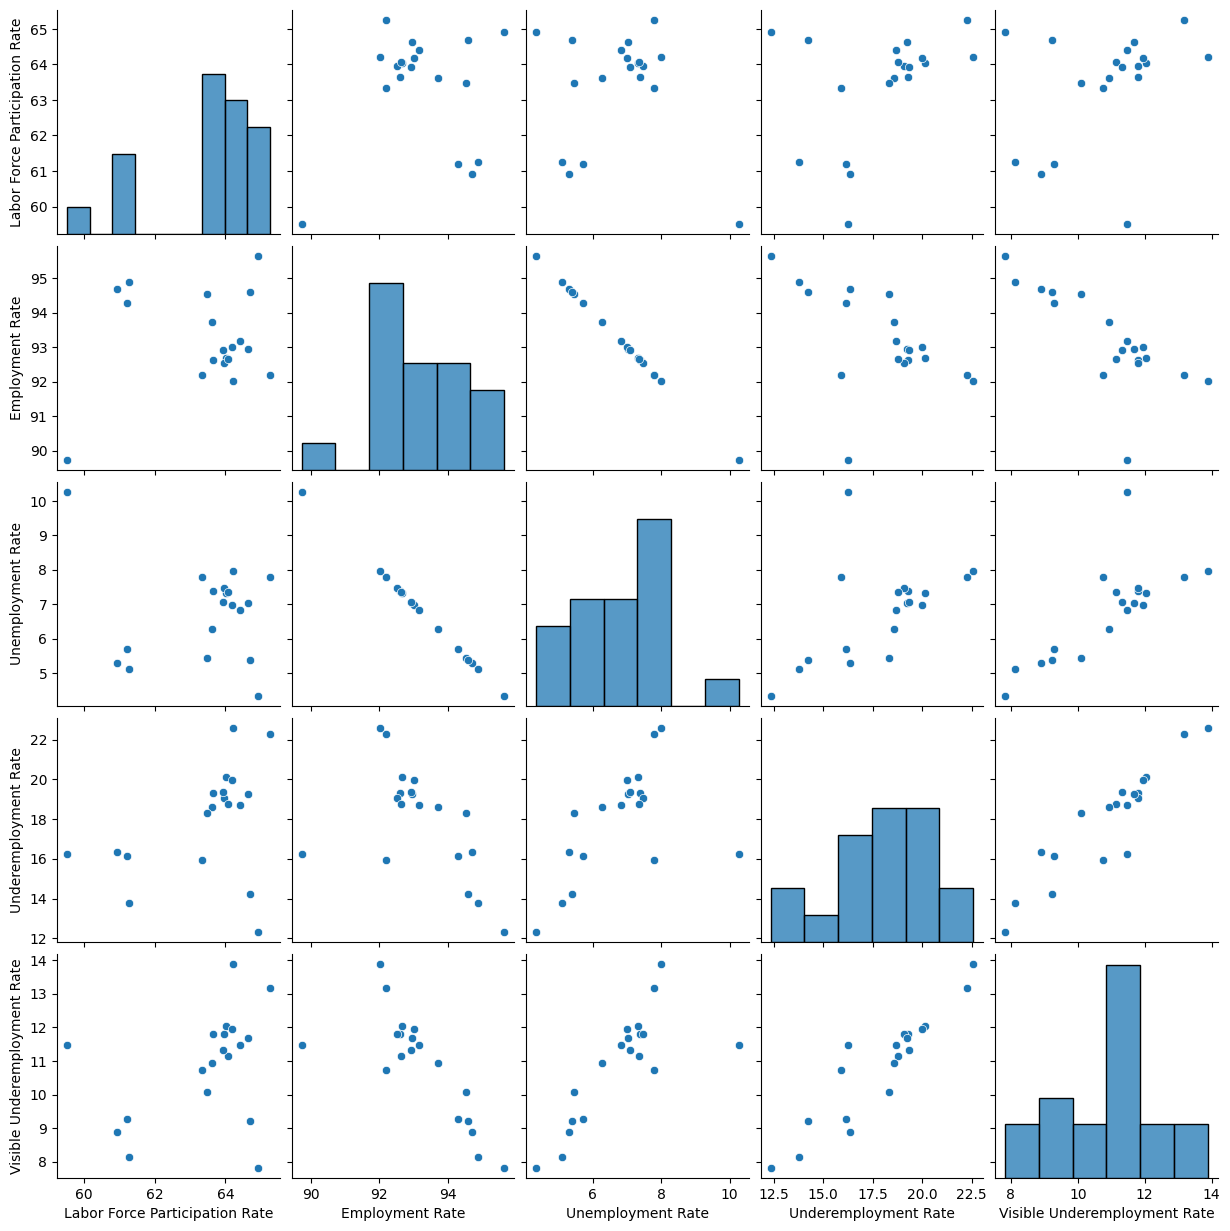

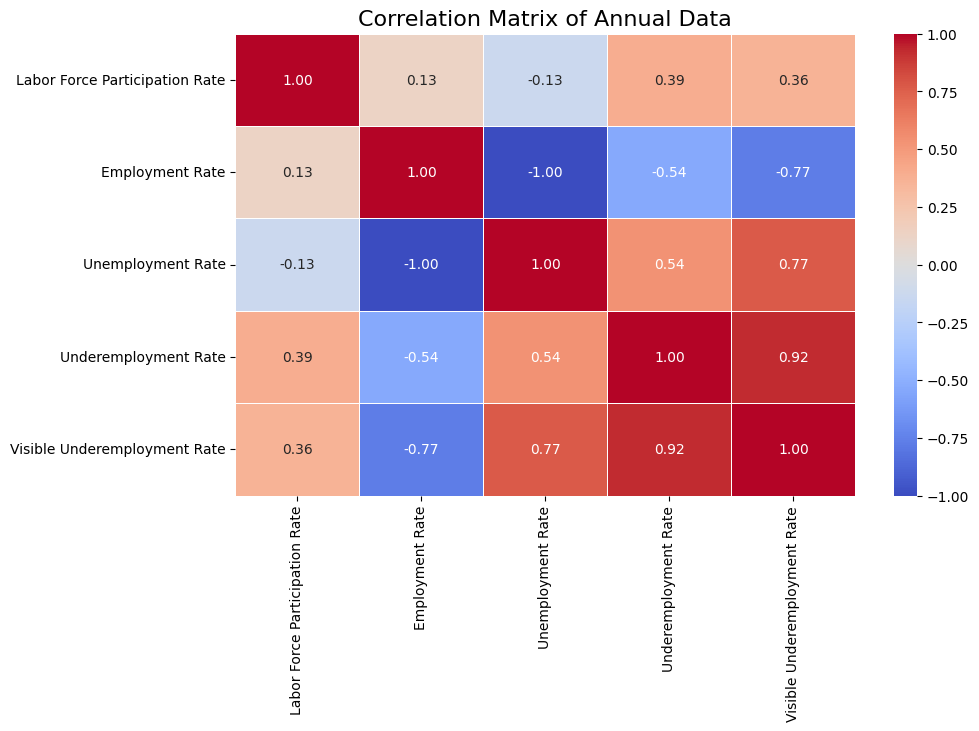

                                Labor Force Participation Rate  \
Labor Force Participation Rate                        1.000000   
Employment Rate                                       0.128557   
Unemployment Rate                                    -0.128557   
Underemployment Rate                                  0.391569   
Visible Underemployment Rate                          0.359477   

                                Employment Rate  Unemployment Rate  \
Labor Force Participation Rate         0.128557          -0.128557   
Employment Rate                        1.000000          -1.000000   
Unemployment Rate                     -1.000000           1.000000   
Underemployment Rate                  -0.535407           0.535407   
Visible Underemployment Rate          -0.769272           0.769272   

                                Underemployment Rate  \
Labor Force Participation Rate              0.391569   
Employment Rate                            -0.535407   
Unemployment R

In [316]:
sns.pairplot(annual_data, vars=numeric_columns)
plt.show()

correlation_matrix = annual_data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Annual Data', fontsize=16)
plt.show()

correlations = annual_data[numeric_columns].corr()
print(correlations)


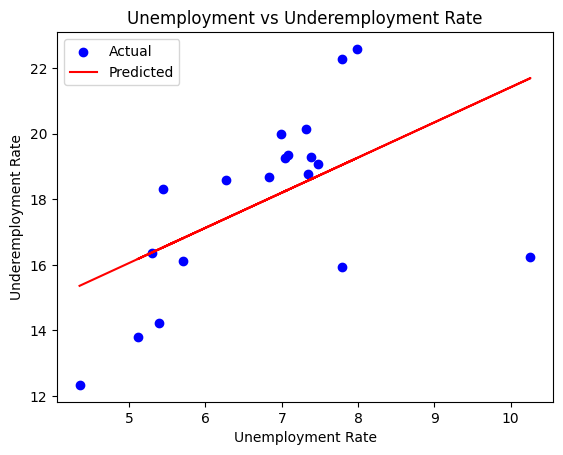

Slope: 1.0711086141088504, Intercept: 10.700891788733347
R-squared: 0.28666013177934235


In [317]:
from sklearn.linear_model import LinearRegression
import numpy as np

# For Annually
X = annual_data['Unemployment Rate'].values.reshape(-1, 1)
y = annual_data['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")


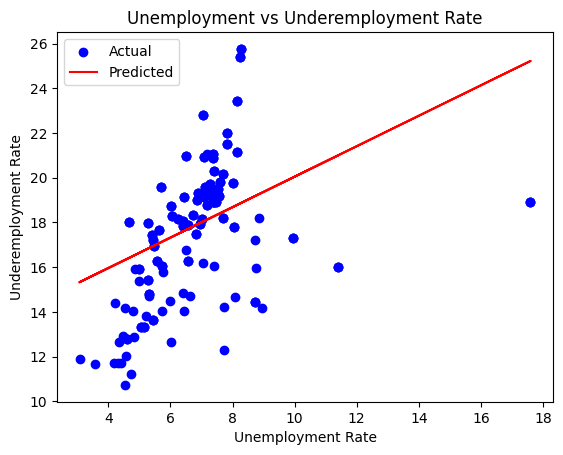

Slope: 0.6809307197255146, Intercept: 13.23613583556865
R-squared: 0.17918453960545788


In [318]:
# For monthly
X = df['Unemployment Rate'].values.reshape(-1, 1)
y = df['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")

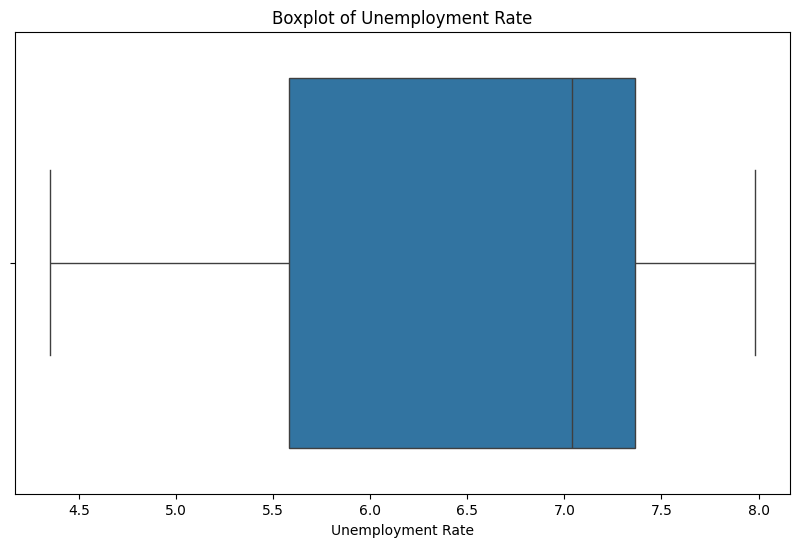

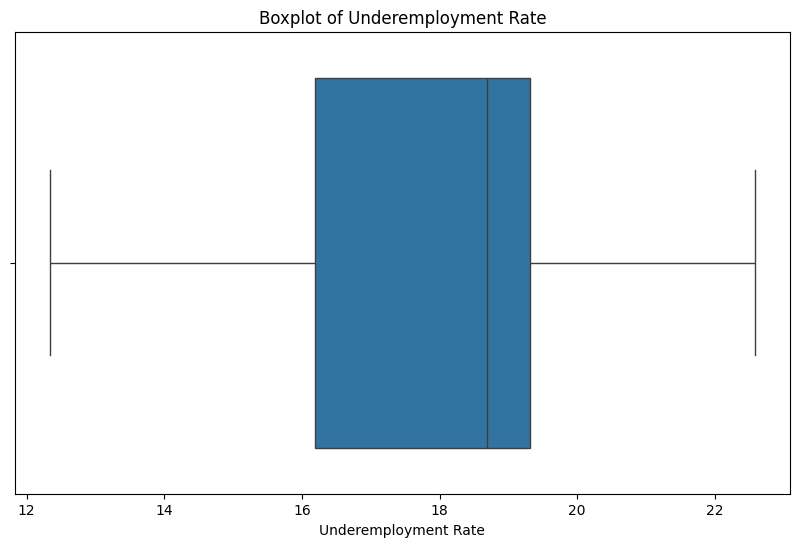

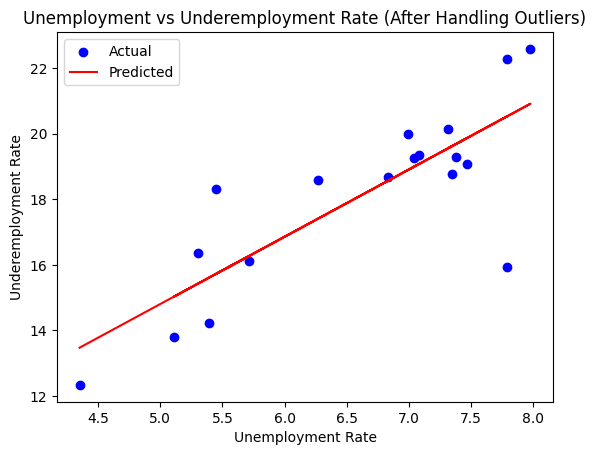

Slope: 2.048611503137417, Intercept: 4.563037540439019
R-squared: 0.6614313664340539


In [319]:
# For yearly

# Managing outlier
from scipy.stats import zscore

# Calculate Z-scores for both 'Unemployment Rate' and 'Underemployment Rate'
unemployment_z = zscore(annual_data['Unemployment Rate'])
underemployment_z = zscore(annual_data['Underemployment Rate'])

# Identify outliers (Z-score > 3 or < -3)
unemployment_outliers = annual_data[abs(unemployment_z) > 3]
underemployment_outliers = annual_data[abs(underemployment_z) > 3]

# Option 1: Remove outliers
annual_data_cleaned = annual_data[(abs(unemployment_z) <= 3) & (abs(underemployment_z) <= 3)]

# Option 2: Replace outliers with the median (or mean)
annual_data['Unemployment Rate'] = annual_data['Unemployment Rate'].apply(
    lambda x: annual_data['Unemployment Rate'].median() if abs(zscore([x])) > 3 else x)
annual_data['Underemployment Rate'] = annual_data['Underemployment Rate'].apply(
    lambda x: annual_data['Underemployment Rate'].median() if abs(zscore([x])) > 3 else x)

# Calculate Q1 and Q3 for both 'Unemployment Rate' and 'Underemployment Rate'
Q1_unemployment = annual_data['Unemployment Rate'].quantile(0.25)
Q3_unemployment = annual_data['Unemployment Rate'].quantile(0.75)
IQR_unemployment = Q3_unemployment - Q1_unemployment

Q1_underemployment = annual_data['Underemployment Rate'].quantile(0.25)
Q3_underemployment = annual_data['Underemployment Rate'].quantile(0.75)
IQR_underemployment = Q3_underemployment - Q1_underemployment

# Identify outliers based on IQR
unemployment_outliers = annual_data[(annual_data['Unemployment Rate'] < (Q1_unemployment - 1.5 * IQR_unemployment)) |
                                    (annual_data['Unemployment Rate'] > (Q3_unemployment + 1.5 * IQR_unemployment))]

underemployment_outliers = annual_data[(annual_data['Underemployment Rate'] < (Q1_underemployment - 1.5 * IQR_underemployment)) |
                                       (annual_data['Underemployment Rate'] > (Q3_underemployment + 1.5 * IQR_underemployment))]

# Option 1: Remove outliers
annual_data_cleaned = annual_data[
    (annual_data['Unemployment Rate'] >= (Q1_unemployment - 1.5 * IQR_unemployment)) &
    (annual_data['Unemployment Rate'] <= (Q3_unemployment + 1.5 * IQR_unemployment)) &
    (annual_data['Underemployment Rate'] >= (Q1_underemployment - 1.5 * IQR_underemployment)) &
    (annual_data['Underemployment Rate'] <= (Q3_underemployment + 1.5 * IQR_underemployment))
]

# Option 2: Replace outliers with the median
annual_data['Unemployment Rate'] = annual_data['Unemployment Rate'].apply(
    lambda x: annual_data['Unemployment Rate'].median() if x < (Q1_unemployment - 1.5 * IQR_unemployment) or x > (Q3_unemployment + 1.5 * IQR_unemployment) else x)
annual_data['Underemployment Rate'] = annual_data['Underemployment Rate'].apply(
    lambda x: annual_data['Underemployment Rate'].median() if x < (Q1_underemployment - 1.5 * IQR_underemployment) or x > (Q3_underemployment + 1.5 * IQR_underemployment) else x)

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=annual_data['Unemployment Rate'])
plt.title('Boxplot of Unemployment Rate')
plt.show()

# Boxplot for Underemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=annual_data['Underemployment Rate'])
plt.title('Boxplot of Underemployment Rate')
plt.show()

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Use the cleaned data (after handling outliers)
X = annual_data_cleaned['Unemployment Rate'].values.reshape(-1, 1)
y = annual_data_cleaned['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate (After Handling Outliers)')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")


In [321]:
# Check for non-numeric values
print(monthly_data['Unemployment Rate'].dtype)
print(monthly_data['Underemployment Rate'].dtype)

# Convert to numeric (if needed)
monthly_data['Unemployment Rate'] = pd.to_numeric(monthly_data['Unemployment Rate'], errors='coerce')
monthly_data['Underemployment Rate'] = pd.to_numeric(monthly_data['Underemployment Rate'], errors='coerce')


object
object


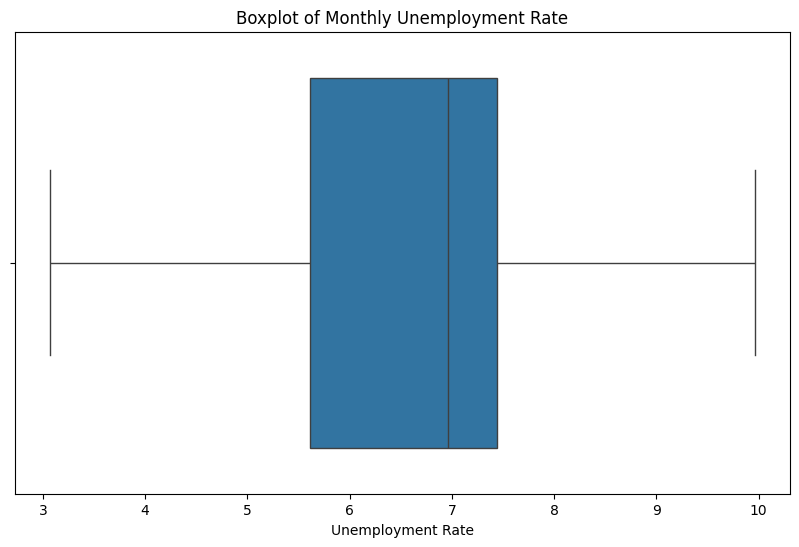

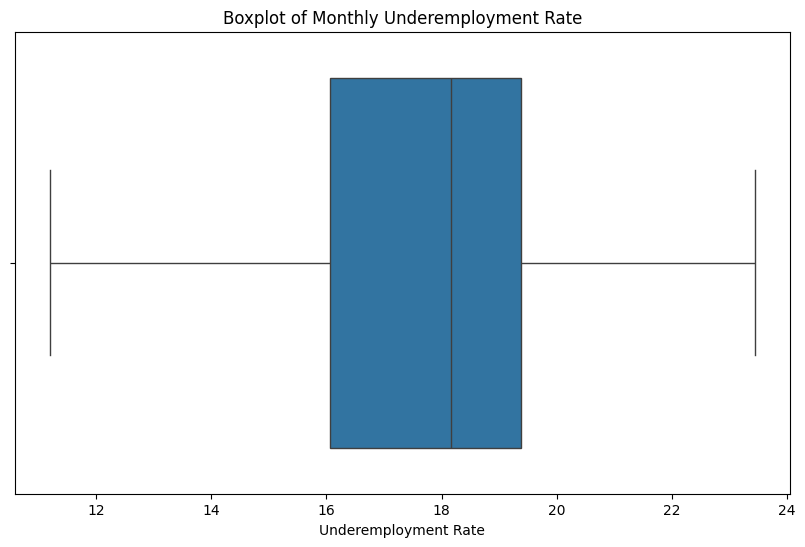

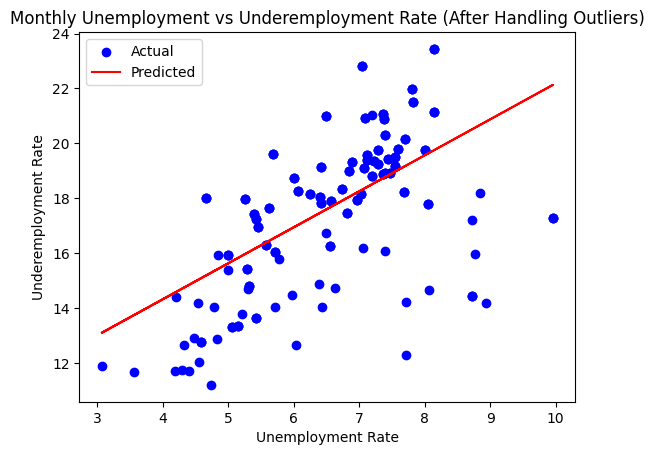

Slope: 1.3101153925239166, Intercept: 9.081298726000703
R-squared: 0.3571725259069082


In [322]:
# For monthly
from scipy.stats import zscore

# Calculate Z-scores for the monthly 'Unemployment Rate' and 'Underemployment Rate'
unemployment_z_monthly = zscore(monthly_data['Unemployment Rate'])
underemployment_z_monthly = zscore(monthly_data['Underemployment Rate'])

# Identify outliers (Z-score > 3 or < -3)
unemployment_outliers_monthly = monthly_data[abs(unemployment_z_monthly) > 3]
underemployment_outliers_monthly = monthly_data[abs(underemployment_z_monthly) > 3]

# Option 1: Remove outliers
monthly_data_cleaned = monthly_data[(abs(unemployment_z_monthly) <= 3) & (abs(underemployment_z_monthly) <= 3)]

# Option 2: Replace outliers with the median
monthly_data['Unemployment Rate'] = monthly_data['Unemployment Rate'].apply(
    lambda x: monthly_data['Unemployment Rate'].median() if abs(zscore([x])) > 3 else x)
monthly_data['Underemployment Rate'] = monthly_data['Underemployment Rate'].apply(
    lambda x: monthly_data['Underemployment Rate'].median() if abs(zscore([x])) > 3 else x)

# Calculate Q1 and Q3 for the monthly 'Unemployment Rate' and 'Underemployment Rate'
Q1_unemployment_monthly = monthly_data['Unemployment Rate'].quantile(0.25)
Q3_unemployment_monthly = monthly_data['Unemployment Rate'].quantile(0.75)
IQR_unemployment_monthly = Q3_unemployment_monthly - Q1_unemployment_monthly

Q1_underemployment_monthly = monthly_data['Underemployment Rate'].quantile(0.25)
Q3_underemployment_monthly = monthly_data['Underemployment Rate'].quantile(0.75)
IQR_underemployment_monthly = Q3_underemployment_monthly - Q1_underemployment_monthly

# Identify outliers based on IQR
unemployment_outliers_monthly = monthly_data[(monthly_data['Unemployment Rate'] < (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly)) |
                                             (monthly_data['Unemployment Rate'] > (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly))]

underemployment_outliers_monthly = monthly_data[(monthly_data['Underemployment Rate'] < (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly)) |
                                                (monthly_data['Underemployment Rate'] > (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly))]

# Option 1: Remove outliers
monthly_data_cleaned = monthly_data[
    (monthly_data['Unemployment Rate'] >= (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly)) &
    (monthly_data['Unemployment Rate'] <= (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly)) &
    (monthly_data['Underemployment Rate'] >= (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly)) &
    (monthly_data['Underemployment Rate'] <= (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly))
]

# Option 2: Replace outliers with the median
monthly_data['Unemployment Rate'] = monthly_data['Unemployment Rate'].apply(
    lambda x: monthly_data['Unemployment Rate'].median() if x < (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly) or x > (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly) else x)
monthly_data['Underemployment Rate'] = monthly_data['Underemployment Rate'].apply(
    lambda x: monthly_data['Underemployment Rate'].median() if x < (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly) or x > (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly) else x)

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Monthly Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_data['Unemployment Rate'])
plt.title('Boxplot of Monthly Unemployment Rate')
plt.show()

# Boxplot for Monthly Underemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_data['Underemployment Rate'])
plt.title('Boxplot of Monthly Underemployment Rate')
plt.show()

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Use the cleaned monthly data
X_monthly = monthly_data_cleaned['Unemployment Rate'].values.reshape(-1, 1)
y_monthly = monthly_data_cleaned['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X_monthly, y_monthly)

# Predictions
y_pred_monthly = model.predict(X_monthly)

# Plot results
plt.scatter(X_monthly, y_monthly, color='blue', label='Actual')
plt.plot(X_monthly, y_pred_monthly, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Monthly Unemployment vs Underemployment Rate (After Handling Outliers)')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X_monthly, y_monthly)}")
